- Güneş lekeleri veri seti kullanılmıştır. Ulusal Jeofizik Veri Merkezi'nden güneş lekeleri hakkında yıllık (1700-2008) veri içerir.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm

In [3]:
sunspots = sm.datasets.sunspots.load_pandas().data

In [5]:
sunspots.index = pd.Index(sm.tsa.datetools.dates_from_range("1700", "2008"))
del sunspots["YEAR"]

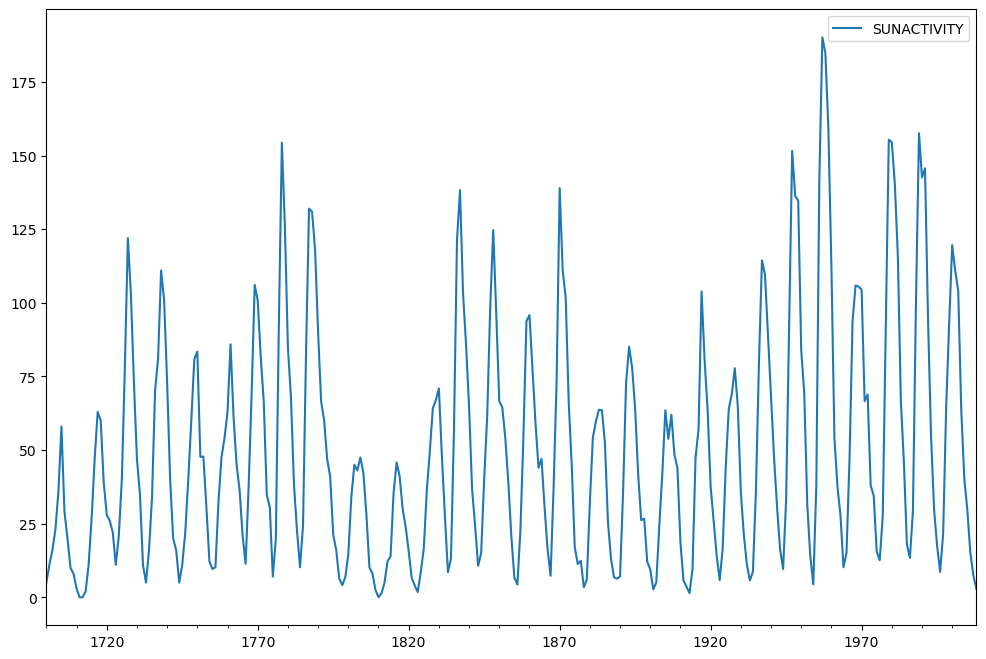

In [7]:
sunspots.plot(figsize=(12, 8));

## ADF testi
- ADF testi, serideki birim kökünün varlığını belirlemek için kullanılır ve dolayısıyla serinin **durağan olup olmadığını** anlamaya yardımcı olur.
- Bu testin sıfır ve alternatif hipotezleri şunlardır:- H0zi: Serinin birim kökü vardı
- H1: ez: Serinin birim kökü yokt
r.

Eğer sıfır hipotezi reddedilemezse bu test serinin durağan olmadığına dair kanıt sağlayabilir.

In [10]:
from statsmodels.tsa.stattools import adfuller


def adf_test(timeseries):
    print("Results of Dickey-Fuller Test:")
    dftest = adfuller(timeseries, autolag="AIC")
    dfoutput = pd.Series(
        dftest[0:4],
        index=[
            "Test Statistic",
            "p-value",
            "#Lags Used",
            "Number of Observations Used",
        ],
    )
    for key, value in dftest[4].items():
        dfoutput["Critical Value (%s)" % key] = value
    print(dfoutput)

In [19]:
adf_test(sunspots["SUNACTIVITY"])

Results of Dickey-Fuller Test:
Test Statistic                  -2.837781
p-value                          0.053076
#Lags Used                       8.000000
Number of Observations Used    300.000000
Critical Value (1%)             -3.452337
Critical Value (5%)             -2.871223
Critical Value (10%)            -2.571929
dtype: float64


- 0,05'lik anlamlılık düzeyi ve ADF testinin p-değeri temel alındığında, sıfır hipotezi reddedilemez. Dolayısıyla seri durağan değildir.

## KPSS
- KPSS, bir zaman serisinin durağanlığını kontrol etmek için kullanılan başka bir testtir.
- KPSS testi için sıfır ve alternatif hipotez, ADF testinin tersidir.ir).

- **H0:** Süreç trend durağandır.
- **H1:** Seri birim köke sahiptir (seri durağan değildir).

In [17]:
from statsmodels.tsa.stattools import kpss


def kpss_test(timeseries):
    print("Results of KPSS Test:")
    kpsstest = kpss(timeseries, regression="c", nlags="auto")
    kpss_output = pd.Series(
        kpsstest[0:3], index=["Test Statistic", "p-value", "Lags Used"]
    )
    for key, value in kpsstest[3].items():
        kpss_output["Critical Value (%s)" % key] = value
    print(kpss_output)

In [22]:
kpss_test(sunspots["SUNACTIVITY"])

Results of KPSS Test:
Test Statistic           0.669866
p-value                  0.016285
Lags Used                7.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64


- 0,05'lik anlamlılık düzeyi ve KPSS testinin p-değeri temel alındığında, alternatif lehine sıfır hipotezini reddetmek için kanıt vardır. Bu nedenle, seri KPSS testine göre durağan değildir.